# 03-Assignment

## 1. Business Understanding

<b> Phishing Websites dataset </b>  <br>
Conduct an automated system that warns users when they are about to visit a phishing website

## 2. Data Understanding

<b> Phishing Websites dataset (UCI) </b>  <br>
- Features: information about websites
- Target:  `result` (1/-1) <br>
(1=phishing 0=Legimate)

In [ ]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree  
from sklearn.metrics import classification_report


phishing_websites = fetch_ucirepo(id=327) 
  
df = phishing_websites.data.original
df.head(5)


,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


## 3. Data Preparation

Splitting the dataset into two datasets:
 - <b>X </b> contains all columns except `result`.
 - <b>y </b> contains only the `result` column.

In [47]:
X = df.drop(columns=['result'])
y = df['result']


## 4. Modeling

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(7738, 30) (3317, 30) (7738,) (3317,)


In [51]:
for i in range(1, 6):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusionmatrix = confusion_matrix(y_test, y_pred)
    print(f"Max depth: {i}, Accuracy: {accuracy:.4f}, Confusion Matrix:\n{confusionmatrix}\n")

Max depth: 1, Accuracy: 0.8897, Confusion Matrix:
[[1264  198]
 [ 168 1687]]

Max depth: 2, Accuracy: 0.9065, Confusion Matrix:
[[1326  136]
 [ 174 1681]]

Max depth: 3, Accuracy: 0.9074, Confusion Matrix:
[[1326  136]
 [ 171 1684]]

Max depth: 4, Accuracy: 0.9171, Confusion Matrix:
[[1325  137]
 [ 138 1717]]

Max depth: 5, Accuracy: 0.9249, Confusion Matrix:
[[1275  187]
 [  62 1793]]



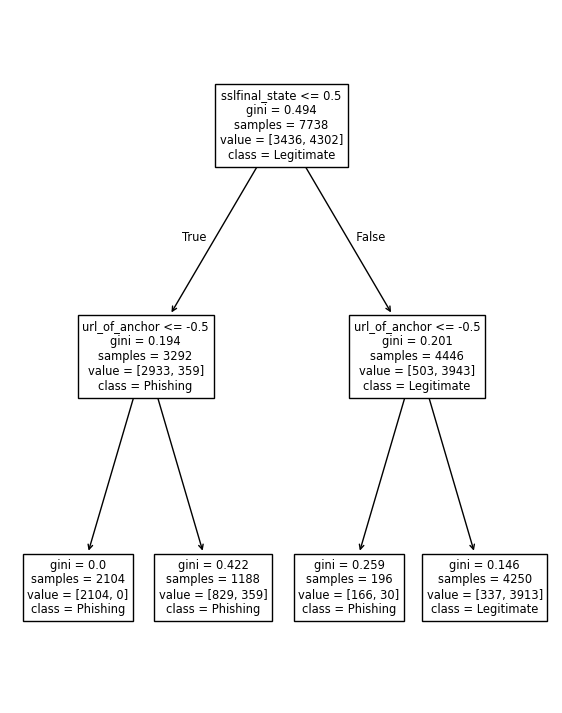

In [56]:
model = DecisionTreeClassifier(max_depth=2, random_state=20)
model.fit(X_train, y_train)
fig = plt.figure(figsize = (7, 9))
plot_tree(model, feature_names = X.keys(), class_names = ['Phishing', 'Legitimate'])
plt.show()

In [57]:
preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("Classification Report:\n", classification_report(y_test, preds))

Accuracy: 0.9065420560747663
Confusion Matrix:
 [[1326  136]
 [ 174 1681]]


NameError: name 'classification_report' is not defined

## 5. Evaluation

## 6. Final Verdic